In [29]:
import numpy as np
import matplotlib.pyplot as plt


In [21]:
# gradient descent 
def gradient_descent(gradient,X,y,start,learn_rate,n_iter=100,tolerance = 1e-6):
    vector = start
    for _ in range(n_iter):
        diff = learn_rate*(gradient(X,y,vector))
        if np.max(np.abs(diff))<=tolerance:
            break
        vector -= diff
    return vector

In [8]:
gradient_descent(gradient=lambda v:2*v, start=10,learn_rate=0.1)

4.017345110647478e-06

In [15]:
def f(v):
    return np.array([v[0]*2, 4*v[1]**3])

In [16]:
gradient_descent(f,start=[1,1],learn_rate =0.1)

array([2.03703598e-10, 1.09038767e-01])

In [45]:
def ssr_gradient(x,y,b):
    res = y - b[0] - b[1]*x
    return np.array([(-1)*res.mean(), (-1)*(res*x).mean()])

In [66]:
X = np.array([5,16,27,36,45,55])
y = np.array([5,20,22,31,22,38])

In [67]:
b0,b1=gradient_descent(ssr_gradient,X,y,[0.5,0.5],learn_rate=0.001,n_iter=1000)

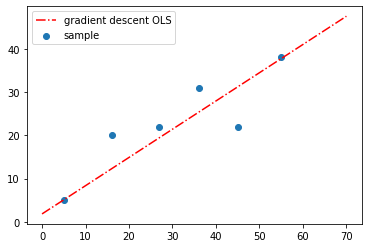

In [88]:
X_coor = np.linspace(0,70,100)
y_coor = b1*X_coor+b0
plt.scatter(X,y,label='sample')
plt.plot(X_coor,y_coor,'-.',color='r',label='gradient descent OLS')
plt.legend()

In [60]:
# note  X*y is element-wise multiplication
X*y

array([  25,  300,  525, 1120,  990, 2090])

In [82]:
# Stochastic Gradient Descent

def sgd(gradient,X,y,start,learn_rate=0.01,decay_rate=0.0,batch_size=2,\
        n_iter=100,tolerance =1e-6,dtype='float64',random_state=42):
    
    if not callable(gradient):
        raise TypeError('gradient not callable')
        
    n_obs = X.shape[0]
    
    vector = np.array(start)
    
    batch_size =int(batch_size)
    n_iter = int(n_iter)
    
    X_y = np.c_[X.reshape(n_obs,-1),y.reshape(n_obs,1)]
    
    rng = np.random.default_rng()
    diff=0
    for _ in range(n_iter):
        rng.shuffle(X_y)
        
        for begin in range(0,n_obs,batch_size):
            stop =  begin+batch_size
            X_batch, y_batch = X_y[begin:stop,:-1], X_y[begin:stop,-1]
            
            grad = np.array(gradient(X_batch,y_batch,vector))
    
            diff = decay_rate*diff-learn_rate*grad
        
            if np.max(np.abs(diff))<=tolerance:
                break
                
            vector += diff
            
    return vector

In [90]:
b0_sgd,b1_sgd = sgd(ssr_gradient,X,y,[0.5,0.5],learn_rate=0.001,decay_rate=0.0,batch_size=2, n_iter=50,tolerance =1e-6,dtype='float64',random_state=42)
print(f"b0 sgd:{b0_sgd} b1 sgd:{b1_sgd}")
print(f"b0 {b0} b1{b1}")

b0 sgd:1.0808802531040549 b1 sgd:0.8845083929797618
b0 1.819858153147457 b10.6525722427040171


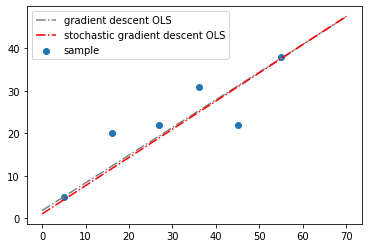

In [89]:
X_coor = np.linspace(0,70,100)
y_coor_sgd = b1_sgd*X_coor+b0_sgd
plt.scatter(X,y,label='sample')
plt.plot(X_coor,y_coor,'-.',color='grey',label='gradient descent OLS')
plt.plot(X_coor,y_coor_sgd,'-.',color='r',label='stochastic gradient descent OLS')
plt.legend()

In [ ]:
# Reference: Stochastic Gradient Descent Algorithm With Python and NumPy
# https://realpython.com/gradient-descent-algorithm-python/